# Recurrent Neural Networks and Audio Processing and Generation


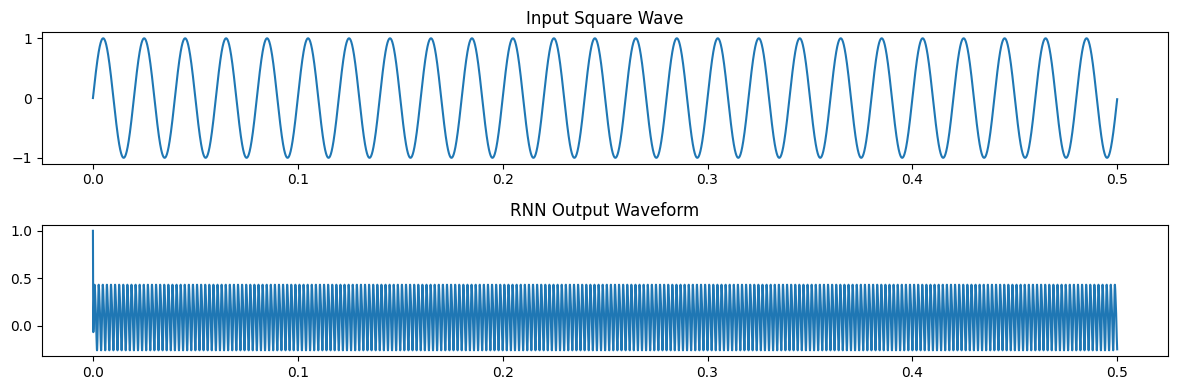

In [21]:
import torch
import numpy as np
from IPython.display import Audio

import torch.nn as nn
import matplotlib.pyplot as plt

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, output_size=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, h0=None):
        out, hn = self.rnn(x, h0)
        out = self.fc(out)
        return out, hn

# Generate a square wave (PWM) sequence
seq_length = 8000  # 0.5s at 16kHz
duty_cycle = 0.5
frequency = 500  # Hz
sample_rate = 16000

t = np.arange(seq_length) / sample_rate
wave_form = (np.sin(2 * np.pi * frequency * t)).astype(np.float32)
input_seq = torch.from_numpy(wave_form).view(1, -1, 1)  # shape: (batch, seq, input_size)

# Initialize and run the RNN
model = SimpleRNN(input_size=1, hidden_size=10, output_size=1)
with torch.no_grad():
    output, _ = model(input_seq)
audio_waveform = output.numpy().flatten()

# Normalize for audio playback
audio_waveform = audio_waveform / np.max(np.abs(audio_waveform))

# Plot the input and output
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(t, square_wave)
plt.title("Input Square Wave")
plt.subplot(2,1,2)
plt.plot(t, audio_waveform)
plt.title("RNN Output Waveform")
plt.tight_layout()
plt.show()

# Play the waveform
Audio(audio_waveform, rate=sample_rate)